In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('Car_sales.csv',encoding = 'ISO-8859-1')

In [3]:
#Removing NaN rows with values
cars = cars.dropna()
cars.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


In [4]:
cars['Model'] = cars['Model'].astype('category')
cars['Manufacturer'] = cars['Manufacturer'].astype('category')

cat_columns = cars.select_dtypes(['category']).columns

cars[cat_columns] = cars[cat_columns].apply(lambda x: x.cat.codes)
cars.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,62,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,0,107,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,0,88,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,1,4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,1,5,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


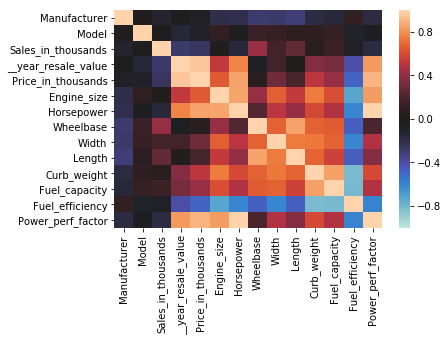

In [5]:
corr = cars.corr()
sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0)

In [6]:
cars = cars.drop(['Manufacturer','Model','Vehicle_type','Wheelbase','Length','Width','Latest_Launch'],axis = 1)

In [7]:
X = cars.drop(['Price_in_thousands'],axis = 1)
Y = cars['Price_in_thousands']
Y = Y.values.reshape(-1,1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [9]:
X_scaled.shape

(117, 8)

In [10]:
Y.shape

(117, 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y_scaled,test_size = 0.2)

In [12]:
#Creating a model
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16,input_dim = 8,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))
model.summary()

C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\Anaconda3\envs\ori-env\lib\site-packages\tensorflow\python\frame

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ["accuracy"])

In [14]:
hist = model.fit(X_train,y_train,epochs = 150,batch_size = 64,verbose = 1, validation_split = 0.2)

Train on 74 samples, validate on 19 samples
Epoch 1/150
74/74 [==============================] - 1s 7ms/step - loss: 0.0866 - acc: 0.0135 - val_loss: 0.0623 - val_acc: 0.0000e+00
Epoch 2/150
74/74 [==============================] - 0s 121us/step - loss: 0.0785 - acc: 0.0135 - val_loss: 0.0554 - val_acc: 0.0000e+00
Epoch 3/150
74/74 [==============================] - 0s 108us/step - loss: 0.0718 - acc: 0.0135 - val_loss: 0.0485 - val_acc: 0.0000e+00
Epoch 4/150
74/74 [==============================] - 0s 121us/step - loss: 0.0652 - acc: 0.0135 - val_loss: 0.0417 - val_acc: 0.0000e+00
Epoch 5/150
74/74 [==============================] - 0s 135us/step - loss: 0.0587 - acc: 0.0135 - val_loss: 0.0351 - val_acc: 0.0000e+00
Epoch 6/150
74/74 [==============================] - 0s 135us/step - loss: 0.0519 - acc: 0.0135 - val_loss: 0.0291 - val_acc: 0.0000e+00
Epoch 7/150
74/74 [==============================] - 0s 135us/step - loss: 0.0454 - acc: 0.0135 - val_loss: 0.0239 - val_acc: 0.0000e+00

74/74 [==============================] - 0s 67us/step - loss: 0.0020 - acc: 0.0135 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 61/150
74/74 [==============================] - 0s 81us/step - loss: 0.0019 - acc: 0.0135 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 62/150
74/74 [==============================] - 0s 84us/step - loss: 0.0019 - acc: 0.0135 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 63/150
74/74 [==============================] - 0s 96us/step - loss: 0.0018 - acc: 0.0135 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 64/150
74/74 [==============================] - 0s 107us/step - loss: 0.0018 - acc: 0.0135 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 65/150
74/74 [==============================] - 0s 94us/step - loss: 0.0017 - acc: 0.0135 - val_loss: 0.0028 - val_acc: 0.0000e+00
Epoch 66/150
74/74 [==============================] - 0s 94us/step - loss: 0.0017 - acc: 0.0135 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 67/150
74/74 [==============================] -

74/74 [==============================] - 0s 95us/step - loss: 0.0010 - acc: 0.0135 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 120/150
74/74 [==============================] - 0s 90us/step - loss: 0.0011 - acc: 0.0135 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 121/150
74/74 [==============================] - 0s 135us/step - loss: 0.0010 - acc: 0.0135 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 122/150
74/74 [==============================] - 0s 95us/step - loss: 9.9507e-04 - acc: 0.0135 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 123/150
74/74 [==============================] - 0s 94us/step - loss: 0.0010 - acc: 0.0135 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 124/150
74/74 [==============================] - 0s 91us/step - loss: 9.9071e-04 - acc: 0.0135 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 125/150
74/74 [==============================] - 0s 95us/step - loss: 9.9428e-04 - acc: 0.0135 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 126/150
74/74 [==============

In [15]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

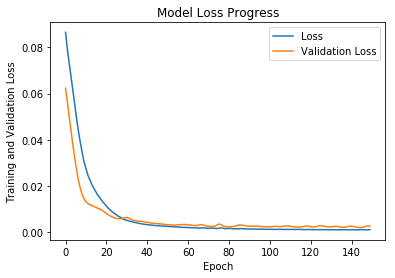

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss Progress')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Loss','Validation Loss'])

In [17]:
y_pred = model.predict(X_test)

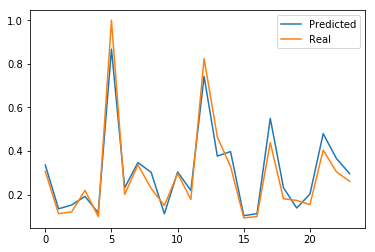

In [18]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['Predicted','Real'])

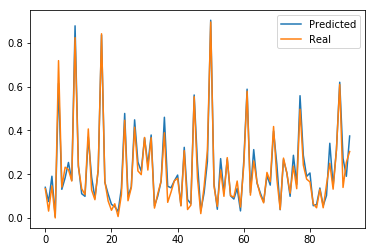

In [19]:
y_pred = model.predict(X_train)
plt.plot(y_pred)
plt.plot(y_train)
plt.legend(['Predicted','Real'])